### import

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ROOT
import ctypes
import math
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np

from main.data_tools.extract_Nevents import get_Nevents

Welcome to JupyROOT 6.26/04


In [2]:
ROOT.gROOT.LoadMacro('/home/jykim/workspace/DRAW_and_FITTING/main/Belle2Style.C')
ROOT.SetBelle2Style()


Applying BELLE2 style settings...


In [3]:
# ROOT.RooClassFactory.makePdf("MyPdf_xsquared_nopara", "x", "", "x*x")
ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared_nopara.cxx+")

94468897372640

(MyPdf_xsquared_nopara) An instance of MyPdf_xsquared_nopara.


In [4]:
# ROOT.RooClassFactory.makePdf("MyPdf_one_minus_squared", "y", "", "1-y*y")
ROOT.gROOT.ProcessLineSync(".x MyPdf_one_minus_squared.cxx+")

94468902097712

(MyPdf_one_minus_squared) An instance of MyPdf_one_minus_squared.


# Extract 2D data(ROOT)

In [5]:
base_file_loc =  '/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_sigbkg/'
# base_file_loc =  '/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/'

loc_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
# loc_ccbar = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'
loc_uubar = base_file_loc + 'uubar/recon_udst_*.root'
loc_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
loc_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
loc_charged = base_file_loc + 'charged/recon_udst_*.root'
loc_mixed = base_file_loc + 'mixed/recon_udst_*.root'
loc_taupair = base_file_loc + 'taupair/recon_udst_*.root'

file_list = [loc_ccbar,loc_uubar,loc_uubar,loc_ssbar,loc_charged,loc_mixed,loc_taupair]


loc_ccbar_CC = base_file_loc + 'ccbar/recon_udst_*.root/antiKstar_cc'
# loc_ccbar = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'
loc_uubar_CC = base_file_loc + 'uubar/recon_udst_*.root/antiKstar_cc'
loc_ddbar_CC = base_file_loc + 'ddbar/recon_udst_*.root/antiKstar_cc'
loc_ssbar_CC = base_file_loc + 'ssbar/recon_udst_*.root/antiKstar_cc'
loc_charged_CC = base_file_loc + 'charged/recon_udst_*.root/antiKstar_cc'
loc_mixed_CC = base_file_loc + 'mixed/recon_udst_*.root/antiKstar_cc'
loc_taupair_CC = base_file_loc + 'taupair/recon_udst_*.root/antiKstar_cc'


file_list += [loc_ccbar_CC,loc_uubar_CC,loc_uubar_CC,loc_ssbar_CC,loc_charged_CC,loc_mixed_CC,loc_taupair_CC]


In [6]:
mychain = ROOT.TChain("antiKstar")
# mychain = ROOT.TChain("antiKstar_cc")

for i in file_list:
    mychain.Add(i)
    
yrange = (-1, 1)
x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", 1.68, 2.05, "")
y = ROOT.RooRealVar("D0_cosHel_0", "cos#theta_{H}", yrange[0], yrange[1], "")
# z = ROOT.RooRealVar("Belle2Pi0Veto_75MeV", "M(D^{0}) [GeV/c^{2}]",0,10, "")
z = ROOT.RooRealVar("dM_pi0_75MeV", "M(D^{0}) [GeV/c^{2}]",0,10, "")


# data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & Belle2Pi0Veto_75MeV > 0.022 ")
before_data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022 ")


w_1 = ROOT.RooRealVar('w_1', 'w', 0,1)
w_1.setVal(1)
before_data.addColumn(w_1)
data = ROOT.RooDataSet(before_data.GetName(), before_data.GetTitle(),before_data, before_data.get(), '' ,  'w_1')
N_total = data.sumEntries()
print(N_total)

155544.0
[#1] INFO:InputArguments -- The formula  D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022  claims to use the variables (D0_M,D0_cosHel_0,dM_pi0_75MeV) but only (D0_M,dM_pi0_75MeV) seem to be in use.
  inputs:          D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022 
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #1 because D0_M cannot accommodate the value 1.66656
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #24 because D0_M cannot accommodate the value 1.67658
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #29 because D0_M cannot accommodate the value 1.65929
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #39 because D0_M cannot accommodate the value 2.07606
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 34055 out-of-range events


In [7]:
# data.Print()

In [8]:
# data = ROOT.RooDataSet(before_data.GetName(), before_data.GetTitle(),before_data, before_data.get(), '' ,  'w')
# data.append(signal_yes_weight)
# N_total = data.sumEntries()
# print(N_total)

In [9]:
# data.sumEntries()

In [10]:
f = ROOT.TFile.Open("/home/jykim/workspace/DRAW_and_FITTING/main/FITTING/antiKstargamma/1D_1ab_sigbkg/antiKstarg_signalMC_fitresult.root")

result_object = ROOT.gDirectory.Get("antiKstarg")
f.Close()

fit_args = result_object.floatParsFinal()

x_sig_alphaL = ROOT.RooRealVar("x_sig_alphaL", "",  fit_args.at(0).getVal()) 
x_sig_alphaR = ROOT.RooRealVar("x_sig_alphaR", "",  fit_args.at(1).getVal()) 
x_sig_mean  = ROOT.RooRealVar("x_sig_mean", "",  fit_args.at(2).getVal()) 
x_sig_nL    = ROOT.RooRealVar("x_sig_nL", "",  fit_args.at(3).getVal()) 
x_sig_nR    = ROOT.RooRealVar("x_sig_nR", "",  fit_args.at(4).getVal()) 
x_sig_sigmaL = ROOT.RooRealVar("x_sig_sigmaL", "",  fit_args.at(5).getVal()) 
x_sig_sigmaR = ROOT.RooRealVar("x_sig_sigmaR", "",  fit_args.at(6).getVal()) 



In [11]:
f = ROOT.TFile.Open("/home/jykim/workspace/DRAW_and_FITTING/main/FITTING/antiKstargamma/1D_1ab_sigbkg/antiKstarg_Vpi0_fitresult.root")
result_object2 = ROOT.gDirectory.Get("antiKstarg")
f.Close()
fit_args2 = result_object2.floatParsFinal()

#V pi0
x_bkg1_alphaL = ROOT.RooRealVar("x_bkg1_alphaL", "",  fit_args2.at(0).getVal()) 
x_bkg1_alphaR = ROOT.RooRealVar("x_bkg1_alphaR", "",  fit_args2.at(1).getVal()) 
x_bkg1_mean  = ROOT.RooRealVar("x_bkg1_mean", "",  fit_args2.at(2).getVal()) 
x_bkg1_nL    = ROOT.RooRealVar("x_bkg1_nL", "",  fit_args2.at(3).getVal()) 
x_bkg1_nR    = ROOT.RooRealVar("x_bkg1_nR", "",  fit_args2.at(4).getVal()) 
x_bkg1_sigmaL = ROOT.RooRealVar("x_bkg1_sigmaL", "",  fit_args2.at(5).getVal()) 
x_bkg1_sigmaR = ROOT.RooRealVar("x_bkg1_sigmaR", "",  fit_args2.at(6).getVal()) 


In [12]:
f = ROOT.TFile.Open("/home/jykim/workspace/DRAW_and_FITTING/main/FITTING/antiKstargamma/1D_1ab_sigbkg/antiKstarg_remain_fitresult.root")
result_object3 = ROOT.gDirectory.Get("antiKstarg")
f.Close()

fit_args3 = result_object3.floatParsFinal()

x_bkg2_mean = ROOT.RooRealVar("x_bkg2_mean", "",  fit_args3.at(0).getVal()) 
x_bkg2frac1 = ROOT.RooRealVar("x_bkg2frac1", "fraction of component 1 in signal", fit_args3.at(1).getVal())
x_bkg2_sigma = ROOT.RooRealVar("x_bkg2_sigma", "",  fit_args3.at(2).getVal()) 
x_bkg2_c0 = ROOT.RooRealVar("x_bkg2_c0", "c0",fit_args3.at(3).getVal()) 
x_bkg2_c1 = ROOT.RooRealVar("x_bkg2_c1", "c0",fit_args3.at(4).getVal()) 


# x_bkg2_tau = ROOT.RooRealVar("x_bkg2_tau", "",  -5,-10,0) 
# x_bkg2_c0 = ROOT.RooRealVar("x_bkg2_c0", "c0",0.2, -1,1) 
# x_bkg2_c1 = ROOT.RooRealVar("x_bkg2_c1", "c0",0.2, -1,1) 

# x_bkg2_c2 = ROOT.RooRealVar("x_bkg2_c2", "c0",0.2, -1,1) 



In [13]:
f = ROOT.TFile.Open("/home/jykim/workspace/DRAW_and_FITTING/main/FITTING/antiKstargamma/1D_1ab_sigbkg/antiKstarg_Vpi0_fitresult_coshel.root")
result_object4 = ROOT.gDirectory.Get("antiKstarg")
f.Close()
fit_args4 = result_object4.floatParsFinal()

y_bkg1_c0        = ROOT.RooRealVar("x_bkg1_c0", "",  fit_args4.at(0).getVal()) 
y_bkg1_c1        = ROOT.RooRealVar("x_bkg1_c1", "",  fit_args4.at(1).getVal()) 
y_bkg1_c2        = ROOT.RooRealVar("x_bkg1_c2", "",  fit_args4.at(2).getVal()) 

y_bkg1_frac1 = ROOT.RooRealVar("x_bkg1_frac1", "",  fit_args4.at(3).getVal()) 
y_bkg1_frac2 = ROOT.RooRealVar("x_bkg1_frac2", "",  fit_args4.at(4).getVal()) 

y_bkg1_2_mean    = ROOT.RooRealVar("x_bkg1_2_mean", "",  fit_args4.at(5).getVal()) 
y_bkg1_2_sigma1  = ROOT.RooRealVar("x_bkg1_2_sigma1", "",  fit_args4.at(6).getVal()) 
y_bkg1_2_sigma2  = ROOT.RooRealVar("x_bkg1_2_sigma2", "",  fit_args4.at(7).getVal()) 


In [14]:
f = ROOT.TFile.Open("/home/jykim/workspace/DRAW_and_FITTING/main/FITTING/antiKstargamma/1D_1ab_sigbkg/antiKstarg_remain_fitresult_coshel.root")
result_object5 = ROOT.gDirectory.Get("antiKstarg")
f.Close()
fit_args5 = result_object5.floatParsFinal()

y_bkg2_c0 = ROOT.RooRealVar("y_bkg2_c0", "",  fit_args5.at(0).getVal()) 
y_bkg2_c1 = ROOT.RooRealVar("y_bkg2_c1", "",  fit_args5.at(1).getVal()) 
#y_bkg2_c2 = ROOT.RooRealVar("y_bkg2_c2", "",  fit_args5.at(2).getVal()) 

In [15]:
# mychain = ROOT.TChain("antiKstar")
# # mychain = ROOT.TChain("phi_cc")

# for i in file_list:
#     mychain.Add(i)

# yrange = (-1, 1)
# x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", 1.68, 2.05, "")
# y = ROOT.RooRealVar("D0_cosHel_0", "cos#theta_{H}", yrange[0], yrange[1], "")
# # z = ROOT.RooRealVar("Belle2Pi0Veto_75MeV", "M(D^{0}) [GeV/c^{2}]",0,10, "")
# z = ROOT.RooRealVar("dM_pi0_75MeV", "M(D^{0}) [GeV/c^{2}]",0,10, "")


# # data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & Belle2Pi0Veto_75MeV > 0.022 ")
# data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022 ")

In [16]:
def Linearity_test(N_Input=100):






    # w_1 = ROOT.RooRealVar('w_1', 'w', 0,1)
    # w_1.setVal(1)
    # before_data.addColumn(w_1)
    # data = ROOT.RooDataSet(before_data.GetName(), before_data.GetTitle(),before_data, before_data.get(), '' ,  'w_1')
    
    # mychain2 = ROOT.TChain("phi")
    # mychain2.Add("/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_optimzed_sigext_signalMC_recon_mdst_phi.root")
    # signal_no_weight = ROOT.RooDataSet("signal_no_weight","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain2), Cut=" D0_M>1.76 & D0_M<1.92 & dM_pi0_75MeV > 0.023 ")
    # signal_no_weight = ROOT.RooDataSet("signal_no_weight","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain2), Cut=" D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.023 ")


    # w = ROOT.RooRealVar('w', 'w', 0,1)


    # N_sig_before = signal_no_weight.sumEntries()
    # print(N_sig_before)

    # N_Input = 100
    # w.setVal(N_Input/N_sig_before)
    # print(w)

    # signal_no_weight.addColumn(w)
    
    # signal_yes_weight = ROOT.RooDataSet(signal_no_weight.GetName(), signal_no_weight.GetTitle(),signal_no_weight, signal_no_weight.get(), '' ,  'w')
    
    # data.append(signal_yes_weight)
    N_total = data.sumEntries()
    print(N_total)
    
    # file1_name="Plot_linearity_test/Linearity_x" + str(N_Input)  + ".png" 
    # file2_name="Plot_linearity_test/Linearity_y" + str(N_Input)  + ".png" 

    ####################
    #D0_M
    # x.setBins(50)
    x_sig_model = ROOT.RooCrystalBall("x_sig_model", "Signal component 2", x, x_sig_mean, x_sig_sigmaL, x_sig_sigmaR, x_sig_alphaL, x_sig_nL, x_sig_alphaR, x_sig_nR)


    #### Construct bkg model for x
    #K- K+ pi0

    # x_bkg1_1 = ROOT.RooGaussian("x_bkg1_1", "Signal component 1", x, x_bkg1_mean, x_bkg1_sigma1)
    # x_bkg1_2 = ROOT.RooCBShape("x_bkg1_2", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigma2, x_bkg1_alpha, x_bkg1_n_CB)
    # x_bkg1_model = ROOT.RooAddPdf("x_bkg1_model", "Signal1", [x_bkg1_1, x_bkg1_2], x_bkg1frac1)

    x_bkg1_model = ROOT.RooCrystalBall("x_bkg1_model", "Signal component 2", x, x_bkg1_mean, x_bkg1_sigmaL, x_bkg1_sigmaR, x_bkg1_alphaL, x_bkg1_nL, x_bkg1_alphaR, x_bkg1_nR)


    ####BKG2
    # remaining
    x_bkg2_2 = ROOT.RooGaussian("x_bkg2_2", "Signal component 1", x,x_bkg2_mean, x_bkg2_sigma)
    x_bkg2_3 = ROOT.RooPolynomial("x_bkg2_3", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0, x_bkg2_c1))
    x_bkg2frac1 = ROOT.RooRealVar("x_bkg2frac1", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
    x_bkg2_model = ROOT.RooAddPdf("x_bkg2_model", "model", [x_bkg2_2, x_bkg2_3], x_bkg2frac1)



    # x_bkg2_model = ROOT.RooHistPdf("x_bkg2_model", "hist_pdf", x, data_hist)
    # x_bkg2_hist = ROOT.RooHistPdf("x_bkg2_hist", "hist_pdf", x, data_hist)

    # x_bkg2_c00 = ROOT.RooRealVar("x_bkg2_c00", "c0",0.1, -1,1.)
    # x_bkg2_poly = ROOT.RooPolynomial("x_bkg2_poly", "Signal component 1", x_bkg2_c00)

    # x_bkg2_model = ROOT.RooAddPdf("x_bkg2_model", "model", [x_bkg2_hist, x_bkg2_poly], x_bkg2frac1)


    # y_bkg3_c1 = ROOT.RooRealVar("y_bkg3_c1", "c1",0.5, 0,1.)
    # y_bkg3_c2 = ROOT.RooRealVar("y_bkg3_c2", "c2",-0.3, -1.,0.)
    # y_bkg3_model = ROOT.RooChebychev("y_bkg3_model", "Signal component 1", y, ROOT.RooArgList(y_bkg3_c0, y_bkg3_c1, y_bkg3_c2))



    #phipi0,Kshort K+k-
    ####BKG3
    # x_bkg3_mean = ROOT.RooRealVar("x_bkg3_mean", "mean of gaussians", 1.65,1.58, 1.68)
    # x_bkg3_sigma1 = ROOT.RooRealVar("x_bkg3_sigma1", "width of gaussians", 0.01,0,0.08)

    # x_bkg3_model = ROOT.RooGaussian("x_bkg3_model", "Signal component 1", x,x_bkg3_mean, x_bkg3_sigma1)
    #x_bkg3_mean = ROOT.RooRealVar("x_bkg3_mean", "mean of gaussians", 1.65,1.58, 1.7)
    #x_bkg3_sigma1 = ROOT.RooRealVar("x_bkg3_sigma1", "width of gaussians", 0.01,0,0.07)


    # x_bkg3_c0 = ROOT.RooRealVar("x_bkg3_c0", "c0",0.1, 0,1.)
    # # c1 = ROOT.RooRealVar("c1", "c1",0.5, 0,1.)
    # # c2 = ROOT.RooRealVar("c2", "c2",-0.3, -1.,0.)
    # x_bkg3_1 = ROOT.RooPolynomial("x_bkg3_1", "Signal component 1", x, ROOT.RooArgList(x_bkg3_c0), lowestOrder=1)

    # x_bkg3_tau = ROOT.RooRealVar("x_bkg3_tau", "tau",-2, -20,0)
    # x_bkg3_2 = ROOT.RooExponential("x_bkg3_2", "Signal component 1", x, x_bkg3_tau)    

    #x_bkg3_2 = ROOT.RooGaussian("x_bkg3_2", "Signal component 1", x, x_bkg3_mean, x_bkg3_sigma1)


    # x_bkg3frac1  = ROOT.RooRealVar("x_bkg3frac1", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
    # x_bkg3_model = ROOT.RooAddPdf("x_bkg3_model", "Signal1", [x_bkg3_1, x_bkg3_2], x_bkg3frac1)

    ################
    #D0_cosHel_0
    # yrange=(-1,1)
    # y = ROOT.RooRealVar("cos#theta_{H}", "cos#theta_{H}", yrange[0], yrange[1], "")
    # y.setBins(50)

    y_sig_model = ROOT.MyPdf_one_minus_squared("y_sig_model", "y_sig", y)

    #### Construct bkg model for y
    #K+ K- pi0
    # y_bkg1_frac1 = ROOT.RooRealVar("y_bkg1_frac1", "fraction of component 1 in signal",y_bkg1_frac1_var,y_bkg1_frac1_var,y_bkg1_frac1_var )
    y_bkg1_2_1 = ROOT.RooGaussian("y_bkg1_2_1", "Signal component 1", y, y_bkg1_2_mean, y_bkg1_2_sigma1)
    y_bkg1_2_2 = ROOT.RooGaussian("y_bkg1_2_2", "Signal component 1", y, y_bkg1_2_mean, y_bkg1_2_sigma2)
    y_bkg1_2 = ROOT.RooAddPdf("y_bkg1_2", "model", [y_bkg1_2_1, y_bkg1_2_2], y_bkg1_frac1)


    y_bkg1_3 = ROOT.RooChebychev("y_bkg1_3", "Signal component 1", y, ROOT.RooArgList(y_bkg1_c0, y_bkg1_c1, y_bkg1_c2))

    # y_bkg1_frac2 = ROOT.RooRealVar("y_bkg1_frac2", "fraction of component 1 in signal" ,y_bkg1_frac2_var,y_bkg1_frac2,y_bkg1_frac2)

    y_bkg1_model = ROOT.RooAddPdf("y_bkg1_model", "model", [y_bkg1_3, y_bkg1_2], y_bkg1_frac2)


    #remaining
    # y_bkg2_c0 = ROOT.RooRealVar("y_bkg2_c0", "c0",0.5, -1,1)
    # y_bkg2_c1 = ROOT.RooRealVar("y_bkg2_c1", "c1",0.2, -1,1)

    # y_bkg2_c0 = ROOT.RooRealVar("y_bkg2_c0", "c0",-1.1456e-01)
    # y_bkg2_c1 = ROOT.RooRealVar("y_bkg2_c1", "c1",3.5924e-01)

    #y_bkg2_model= ROOT.RooPolynomial("y_bkg2_model", "Signal component 1", y, ROOT.RooArgList(y_bkg2_c0, y_bkg2_c1, y_bkg2_c2))
    y_bkg2_model= ROOT.RooChebychev("y_bkg2_model", "Signal component 1", y, ROOT.RooArgList(y_bkg2_c0, y_bkg2_c1))

    ####BKG3
    # y_bkg3_c0 = ROOT.RooRealVar("y_bkg3_c0", "c0",0.1, 0,1.)
    # y_bkg3_c1 = ROOT.RooRealVar("y_bkg3_c1", "c1",0.5, 0,1.)
    # y_bkg3_c2 = ROOT.RooRealVar("y_bkg3_c2", "c2",-0.3, -1.,0.)
    # y_bkg3_model = ROOT.RooChebychev("y_bkg3_model", "Signal component 1", y, ROOT.RooArgList(y_bkg3_c0, y_bkg3_c1, y_bkg3_c2))
    # y_bkg3_model = ROOT.MyPdf_xsquared_nopara("y_bkg3_model", "y_bkg3", y)

    #### Combine bkg models
    # y_phipi0frac = ROOT.RooRealVar("y_phipi0frac", "fraction of component 1 in signal", 0.2, 0.0, 1.0)
    # y_bkg_model = ROOT.RooAddPdf("y_bkg_model", "Signal", [y_bkg1_model, y_bkg2_model], y_phipi0frac)


    ################
    bkg1_xy_model = ROOT.RooProdPdf("bkg1_xy_model","bkg1_xy_model",ROOT.RooArgSet(x_bkg1_model,y_bkg1_model))
    bkg2_xy_model = ROOT.RooProdPdf("bkg2_xy_model","bkg2_xy_model",ROOT.RooArgSet(x_bkg2_model,y_bkg2_model))


    sig_model = ROOT.RooProdPdf("sig_model","sig_xy_model",ROOT.RooArgSet(x_sig_model, y_sig_model))


    ####################################
    # construct signal + bkg pdf
    nsig = ROOT.RooRealVar("nsig","# signal events",N_total*0.01,0,N_total*0.5)
    nbkg1 = ROOT.RooRealVar("nbkg1","# bkg events",N_total*0.8,0, N_total)
    nbkg2 = ROOT.RooRealVar("nbkg2","# bkg events",N_total*0.1,0, N_total*0.5)
    # nbkg3 = ROOT.RooRealVar("nbkg3","# bkg events",100,0, len(D0_M_np_data))

    # nbkg3 = ROOT.RooRealVar("nbkg3","# bkg events",300,0., len(D0_M_np_data))


    # extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg1_xy_model,bkg2_xy_model,bkg3_xy_model), ROOT.RooArgSet(nsig, nbkg1, nbkg2, nbkg3))
    extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg1_xy_model,bkg2_xy_model), ROOT.RooArgSet(nsig, nbkg1, nbkg2))

    #####################################
    # # Associated nsig/nbkg as expected number of events with sig/bkg
    # esig = ROOT.RooExtendPdf("esig", "extended signal pdf", sig_xy_model, nsig)
    # ebkg = ROOT.RooExtendPdf("ebkg", "extended background pdf", bkg_xy_model, nbkg)

    # # Sum extended components without coefs
    # # -------------------------------------------------------------------------

    # # Construct sum of two extended pdf (no coefficients required)
    # extended_model = ROOT.RooAddPdf("extended_model", "bkg_sig", [ebkg, esig ])


    # datax = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data['D0_M']}, [x])
    # datay = ROOT.RooDataSet.from_numpy({"cos#theta_{H}": np_data['D0_cosHel_0']}, [y])

    # data = ROOT.RooDataSet.from_numpy({"M(D^{0})": D0_M_np_data, "cos#theta_{H}": D0_cosHel_0_np_data}, [x,y])
    # data = ROOT.RooArgSet(x,y)
    # data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x, y), I)

    canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

    xlow = ctypes.c_double()
    ylow = ctypes.c_double()
    xup = ctypes.c_double()
    yup = ctypes.c_double()

    canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
    canv.Divide(1,2)

    xlow = xlow.value
    ylow = ylow.value
    xup = xup.value
    yup = yup.value

    upPad = canv.GetPad(1)
    upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

    dwPad = canv.GetPad(2)
    dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))
    
    r = extended_model.fitTo(data,NumCPU=11, Extended=ROOT.kTRUE,PrintLevel=-1, Save=1)

    nsig.setVal(N_Input)

    mcstudy = ROOT.RooMCStudy(
        extended_model,
        {x,y},
        # Binned=True,
        Silence=True,
        Extended=True,
        FitOptions=dict(Save=True, PrintEvalErrors=0, NumCPU=12),
    )

    # Generate and fit events
    # ---------------------------------------------

    # Generate and fit 1000 samples of Poisson(nExpected) events
    mcstudy.generateAndFit(500)

    # Explore results of study
    # ------------------------------------------------
    # ------------------------------------------------

    # Make plots of the distributions of mean, error on mean and the pull of
    # mean
    frame1 = mcstudy.plotParam(nsig, Bins=50)
    frame2 = mcstudy.plotError(nsig, Bins=50)
    frame3 = mcstudy.plotPull(nsig, Bins=50, FitGauss=False)
    pullMean = ROOT.RooRealVar("pullMean","",0,-10,10)
    pullSigma = ROOT.RooRealVar("pullSigma","",1,0.1,5)
    #pullMean.setPlotLabel("pull #mu")   # // optional (to get nicer plot labels if you want)
    #pullSigma.setPlotLabel("pull #sigma")
    pullMean.setPlotLabel("#mu")   # // optional (to get nicer plot labels if you want)
    pullSigma.setPlotLabel("#sigma")

    pullGauss = ROOT.RooGaussian("pullGauss", "", frame3.getPlotVar() , pullMean, pullSigma)
    r_pull = pullGauss.fitTo(mcstudy.fitParDataSet(),NumCPU=11,PrintLevel=-1)
    # Plot distribution of minimized likelihood
    frame4 = mcstudy.plotNLL(Bins=50)

    # Make some histograms from the parameter dataset
    # hh_cor_a0_s1f = mcstudy.fitParDataSet().createHistogram("hh", x_sig_sigma2, YVar=x_sig_mean)
    # hh_cor_a0_a1 = mcstudy.fitParDataSet().createHistogram("hh", x_sig_mean, YVar=x_sig_sigma2)

    # Access some of the saved fit results from individual toys
    # corrHist000 = mcstudy.fitResult(0).correlationHist("c000")
    # corrHist127 = mcstudy.fitResult(1).correlationHist("c001")
    # corrHist953 = mcstudy.fitResult(2).correlationHist("c002")

    # Draw all plots on a canvas
    # ROOT.gStyle.SetPalette(1)
    # ROOT.gStyle.SetOptStat(0)
    c = ROOT.TCanvas("Canvas", "ToyMCstudy", 1500, 500)
    c.Divide(3, 1)
    c.cd(1)
    # ROOT.gPad.SetLeftMargin(0.15)
    # frame3.GetYaxis().SetTitleOffset(1.4)
    pullGauss.plotOn(frame3)
    #pullGauss.paramOn(frame3,xmin=0.55, xmax=0.75, ymax=0.9, sigDigits=3)
    pullGauss.paramOn(frame3, ROOT.RooFit.Layout(0.60, 0.80, 0.9), ROOT.RooFit.Format("NE",ROOT.RooFit.AutoPrecision(1)))

    frame3.Draw("PE")
    #
    c.cd(2)
    nsig_Mean = ROOT.RooRealVar("nsig_Mean","", N_Input,0.5*N_Input,1.5*N_Input)
    nsig_Sigma = ROOT.RooRealVar("nsig_Sigma","",N_Input*0.5,N_Input*0.001,N_Input*0.8)
    nsig_Mean.setPlotLabel("#mu")   # // optional (to get nicer plot labels if you want)
    nsig_Sigma.setPlotLabel("#sigma")

    nsig_Gauss = ROOT.RooGaussian("nsig_Gauss", "", frame1.getPlotVar() , nsig_Mean, nsig_Sigma)
    
    r_nsig = nsig_Gauss.fitTo(mcstudy.fitParDataSet(),NumCPU=12,PrintLevel=-1)

    nsig_Gauss.plotOn(frame1)
    #pullGauss.paramOn(frame3,xmin=0.55, xmax=0.75, ymax=0.9, sigDigits=3)
    nsig_Gauss.paramOn(frame1, ROOT.RooFit.Layout(0.60, 0.80, 0.9), ROOT.RooFit.Format("NE",ROOT.RooFit.AutoPrecision(1)))

    
    frame1.Draw("PE")
    c.cd(3)
    # ROOT.gPad.SetLeftMargin(0.15)
    # frame2.GetYaxis().SetTitleOffset(1.4)
    frame2.Draw("PE")
    # c.cd(4)
    # #ROOT.gPad.SetLeftMargin(0.15)
    # frame4.GetYaxis().SetTitleOffset(1.4)
    # frame4.Draw("PE")
    file_name="/media/jykim/T7/saved_plots/fitting/linearity/antiKstarg/230807_linearity_" + str(N_Input)  + ".png" 
    c.SaveAs(file_name)

    # Make ROOT.RooMCStudy object available on command line after
    # macro finishes
    # ROOT.gDirectory.Add(mcstudy)
    
    Nsig_mean = nsig_Mean.getValV()
    Nsig_mean_error = nsig_Mean.getError()
    
    return Nsig_mean, Nsig_mean_error

In [17]:
# Linearity_test(500)

In [18]:
6538*2 - 6338*2

400

In [26]:
N_start = 6338*2
N_end = 6538*2
N_step = 4
N_input = list()
for i in range(N_start,N_end, N_step):
    N_input.append(i)

In [ ]:
N_predict = list()
Fit_error = list()

#N_sig_fit = 681
#sqrt(681) ~ 26.0959
# 26.0959 * 3 = 78

for i in range(N_start,N_end, N_step):
    N_input.append(i)
    
    N_fit, temp_fit_error = Linearity_test(i)
    N_predict.append(N_fit)
    Fit_error.append(temp_fit_error)
    
    print(f'Prediction: {N_fit}, Input: {i}, Error: {temp_fit_error}')

155544.0


In [27]:
len(N_input)

100

In [28]:
len(N_predict)

100

iminuit version: 2.15.2


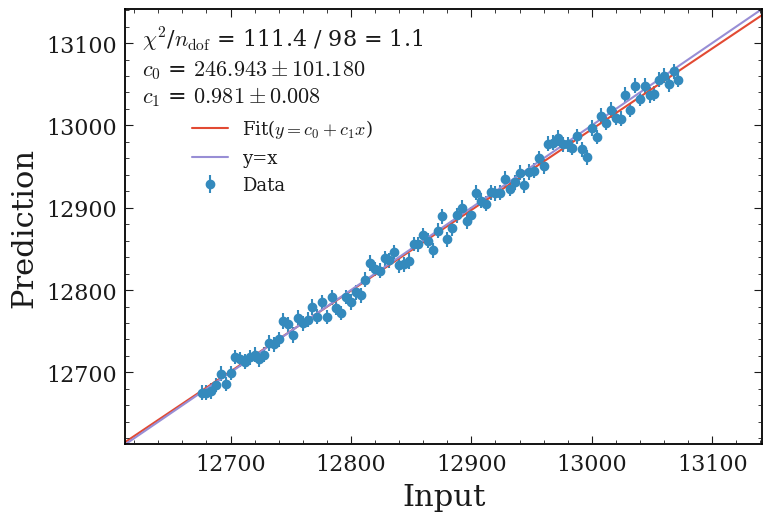

In [29]:

import matplotlib.pyplot as plt
# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

# display iminuit version
import iminuit
print("iminuit version:", iminuit.__version__)

# our line model, unicode parameter names are supported :)
def line(x, c0, c1):
    return c0 + x * c1

least_squares = LeastSquares(N_input, N_predict, Fit_error, line)

m = Minuit(least_squares, c0=0, c1=0)  # starting values for α and β

m.migrad()  # finds minimum of least_squares function
m.hesse()  


# # plt.scatter(N_input, N_predict)



plt.errorbar(N_input, N_predict, yerr=Fit_error, fmt="o",label='Data')

# N_input = np.array(N_input)
np_N_input = np.linspace(N_start*0.97,N_end*1.03,101)

plt.plot(np_N_input, line(np_N_input, *m.values), label=r"Fit($y=c_0+c_1x$)")
# plt.plot([N_start*0.9,N_end*1.05], line([N_start*0.9,N_end*1.05], *m.values), label=r"Fit($y=c_0+c_1x$)")




# plt.xlim(N_start*0.9,N_end*1.05)
# plt.ylim(N_start*0.9,N_end*1.05)
plt.plot([N_start*0.97,N_end*1.03], [N_start*0.97,N_end*1.03], label='y=x')

# plt.plot([N_start,N_end], [N_start,N_end], label='y=x')


# plt.legend()
# plt.show()


# display legend with some fit info
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m.fval:.1f} / {m.ndof:.0f} = {m.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    if p=='c0':
        p = r'$c_0$'
    elif p=='c1':
        p = r'$c_1$'
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

plt.legend(title="\n".join(fit_info), frameon=False, fontsize=13)

plt.xlabel("Input")
plt.ylabel("Prediction")
plt.xlim(N_start*0.995,N_end*1.005)
plt.ylim(N_start*0.995,N_end*1.005)
# plt.xlim(N_start,N_end)
# plt.ylim(N_start,N_end)
plt.tight_layout()
plt.savefig("/media/jykim/T7/saved_plots/fitting/linearity/antiKstarg/Linearity_test_230807_400_4interval_500Toy.png")
plt.show();
